## EDA for grades, sub grades and interest rating models

In [34]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as myFunc
import warnings
import scipy.stats as ss

sns.set_palette("viridis")
warnings.simplefilter(action="ignore", category=FutureWarning)

In [36]:
pd.set_option("float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)

# Preparation for EDA

In this EDA we will be focusing just in accepted loeans dataset. Our targets will be interest rate, grade and subgrade.

In [37]:
accepted_loan_df = pd.read_csv(
    "final_cleaned_accepted_loan_df.csv", 
)
accepted_loan_df.shape

C:\Users\jonyt\AppData\Local\Temp\ipykernel_3064\1791213652.py:1: DtypeWarning: Columns (45,114,115,116,121,127) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_loan_df = pd.read_csv("final_cleaned_accepted_loan_df.csv", #nrows=5000


(2256394, 134)

In [38]:
accepted_loan_df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term,Month issue_d,Year issue_d,Risk_Score
0,0,3600.00,3600.00,3600.00,36.00,13.99,123.03,C,C4,10.00,MORTGAGE,55000.00,Not Verified,Fully Paid,n,PA,5.91,0.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,4421.72,4421.72,3600.00,821.72,0.00,0.00,0.00,122.67,564.00,560.00,0.00,30.00,1.00,Individual,NaN,NaN,NaN,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,12.00,2015.00,677.00
1,1,24700.00,24700.00,24700.00,36.00,11.99,820.28,C,C1,10.00,MORTGAGE,65000.00,Not Verified,Fully Paid,n,SD,16.06,1.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,25679.66,25679.66,24700.00,979.66,0.00,0.00,0.00,926.35,699.00,695.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,12.00,2015.00,717.00
2,2,20000.00,20000.00,20000.00,60.00,10.78,432.66,B,B4,10.00,MORTGAGE,63000.00,Not Verified,Fully Paid,n,IL,10.78,0.00,0.00,NaN,NaN,6.00,0.00,7869.00,56.20,18.00,w,0.00,0.00,22705.92,22705.92,20000.00,2705.92,0.00,0.00,0.00,15813.30,704.00,700.00,0.00,NaN,1.00,Joint App,71000.00,13.85,Not Verified,0.00,0.00,189699.00,0.00

Our dataset contains over 130 features. We want to retain as many pertinent features as possible,but we also want to ensure a user-friendly experience without overwhelming the user. To tackle this issue, I will drop from this EDA features wich are not correlated with our targets.

Our models will predict grade, subgrade and mortage size. Grades and sub-grades are ordinal categorical variables, so we can assign numbers to each grade and subgrade.

Let's change target values to be a numeric features.

In [39]:
accepted_loan_df["grade_num"] = accepted_loan_df["grade"]
accepted_loan_df["grade_num"] = accepted_loan_df["grade_num"].replace(
    {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6}
)

In [40]:
accepted_loan_df["sub_grade_num"] = accepted_loan_df["sub_grade"]
accepted_loan_df["sub_grade_num"] = accepted_loan_df["sub_grade_num"].replace(
    {
        "A1": 0,
        "A2": 1,
        "A3": 2,
        "A4": 3,
        "A5": 4,
        "B1": 5,
        "B2": 6,
        "B3": 7,
        "B4": 8,
        "B5": 9,
        "C1": 10,
        "C2": 11,
        "C3": 12,
        "C4": 13,
        "C5": 14,
        "D1": 15,
        "D2": 16,
        "D3": 17,
        "D4": 18,
        "D5": 19,
        "E1": 20,
        "E2": 21,
        "E3": 22,
        "E4": 23,
        "E5": 24,
        "F1": 25,
        "F2": 26,
        "F3": 27,
        "F4": 28,
        "F5": 29,
        "G1": 30,
        "G2": 31,
        "G3": 32,
        "G4": 33,
        "G5": 34,
    }
)

# Categorical features

In [41]:
accepted_loan_df.describe(include=["O"])

,grade,sub_grade,home_ownership,verification_status,loan_status,pymnt_plan,addr_state,initial_list_status,application_type,verification_status_joint,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_loan_status,disbursement_method,debt_settlement_flag,settlement_status
count,2256394,2256394,2256394,2256394,2256394,2256394,2256394,2256394,2256394,111718,2256394,10894,10894,10894,10894,2256394,2256394,34233
unique,7,35,6,3,9,2,51,2,2,3,2,1,9,3,5,2,2,3
top,B,C1,MORTGAGE,Source Verified,Fully Paid,n,CA,w,Individual,Not Verified,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,Late (16-30 days),Cash,N,ACTIVE
freq,662453,145631,1108717,885754,1076056,2255776,314019,1531820,2139957,54849,2255564,10894,2958,7805,4757,2178533,2222161,14695


We have 18 columns wich are objects.  
Let's create seperate dataframe just of categorical features.

In [42]:
categoricals  = accepted_loan_df.select_dtypes(include=object)
categoricals.head()

,grade,sub_grade,home_ownership,verification_status,loan_status,pymnt_plan,addr_state,initial_list_status,application_type,verification_status_joint,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_loan_status,disbursement_method,debt_settlement_flag,settlement_status
0,C,C4,MORTGAGE,Not Verified,Fully Paid,n,PA,w,Individual,NaN,N,NaN,NaN,NaN,NaN,Cash,N,NaN
1,C,C1,MORTGAGE,Not Verified,Fully Paid,n,SD,w,Individual,NaN,N,NaN,NaN,NaN,NaN,Cash,N,NaN
2,B,B4,MORTGAGE,Not Verified,Fully Paid,n,IL,w,Joint App,Not Verified,N,NaN,NaN,NaN,NaN,Cash,N,NaN
3,C,C5,MORTGAGE,Source Verified,Current,n,NJ,w,Individual,NaN,N,NaN,NaN,NaN,NaN,Cash,N,NaN
4,F,F1,MORTGAGE,Source Verified,Fully Paid,n,PA,w,Individual,NaN,N,NaN,NaN,NaN,NaN,Cash,N,NaN


For better visualination purposes, let's replace nan with the word "unknown".

In [43]:
categoricals = categoricals.fillna(value="Unknown")
categoricals = categoricals.replace({"nan": "Unknown"})

In [45]:
myFunc.count_unique_values(categoricals).sort_values(by="Unique Value Count", ascending=False)

,Column name,Unique Value Count
6,addr_state,51
1,sub_grade,35
4,loan_status,9
12,hardship_reason,9
0,grade,7
2,home_ownership,6
14,hardship_loan_status,5
13,hardship_status,3
9,verification_status_joint,3
3,verification_status,3


We may see, that add_state feature may have 51 different values, so it would not reasonable to use it as one hot encoding, also ir should not be used as ordinal encoding also. If this feature looks not important, we will drop it. 

# Checking of data correctness

In [46]:
col_lst = categoricals.columns.to_list()

for col in col_lst:
    print(categoricals[col].unique())

['C' 'B' 'F' 'A' 'E' 'D' 'G']
['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3'
 'A1' 'D4' 'F3' 'D1' 'B3' 'E4' 'D3' 'D2' 'D5' 'A5' 'F2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5']
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
['Not Verified' 'Source Verified' 'Verified']
['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
['n' 'y']
['PA' 'SD' 'IL' 'NJ' 'GA' 'MN' 'SC' 'RI' 'TX' 'NC' 'CA' 'VA' 'AZ' 'NY'
 'IN' 'MD' 'KS' 'NM' 'AL' 'WA' 'MO' 'OH' 'LA' 'FL' 'CO' 'MI' 'TN' 'DC'
 'MA' 'WI' 'HI' 'VT' 'DE' 'NH' 'NE' 'CT' 'OR' 'AR' 'MT' 'NV' 'WV' 'WY'
 'OK' 'KY' 'MS' 'ME' 'UT' 'ND' 'AK' 'ID' 'IA']
['w' 'f']
['Individual' 'Joint App']
[nan 'Not Verified' 'Verified' 'Source Verified']
['N' 'Y']
[nan 'INTEREST ONLY-3 MONTHS DEFERRAL']
[nan 'NATURAL_DISASTER' 'DIVORCE' 'EXCESSIVE_OBLIGATIONS' 'DISABILITY'
 '

I have reviewd each feature's possible values and we may conclude, that data looks correct.

# Correlation beetween categorical variables

Now let's check correlation of all categorical features with target features.

In [47]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [48]:
def cat_corr(list_of_cats):
    results = []
    for item in list_of_cats:
        results.append(cramers_v(categoricals[item], categoricals.grade))
    return results

In [49]:
df_corr = pd.DataFrame(data=cat_corr(col_lst), index=categoricals.columns)
df_corr.sort_values(by=0, ascending=False)

,0
grade,1.00
sub_grade,1.00
verification_status,0.18
disbursement_method,0.16
initial_list_status,0.14
loan_status,0.10
debt_settlement_flag,0.07
settlement_status,0.04
home_ownership,0.04
hardship_type,0.04


We do not see any coorelation with grade or subgrade. We will not analyse categorical features. We have no ordinal features. We drop state, and the rest will be one hot encoded in modeling part.  

# Target values: grade, sub_grade and int_rate

grade - LC assigned loan grade  
sub_grade - LC assigned loan subgrade  
int_rate - Interest Rate on the loan  

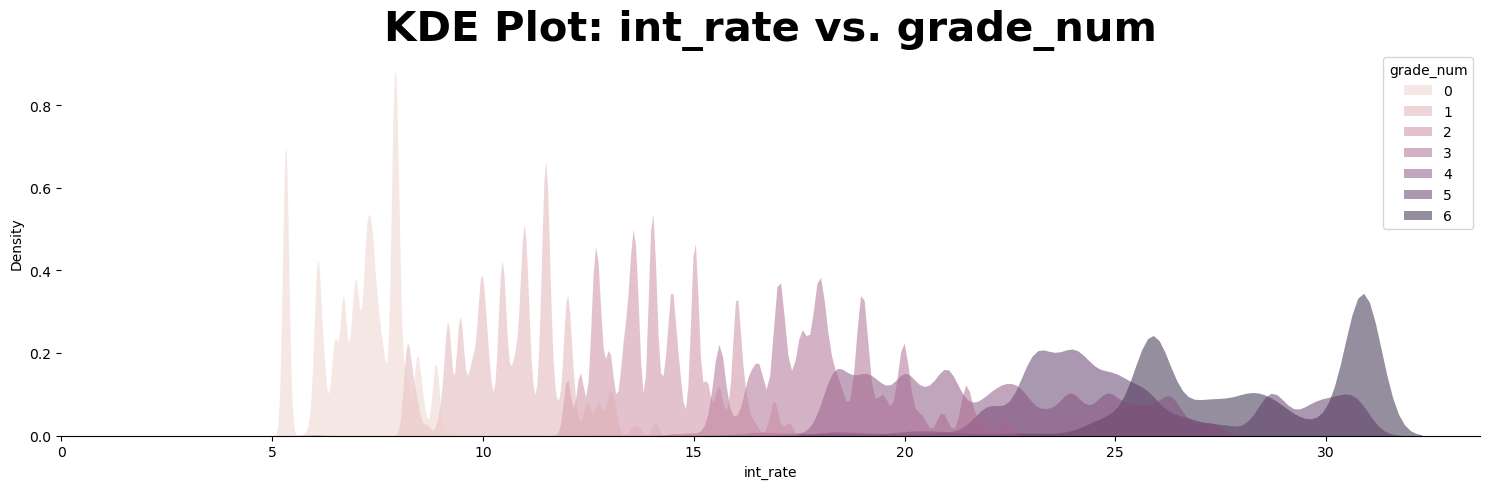

In [50]:
plt.figure(figsize=(15, 5))
plt.title(f"KDE Plot: int_rate vs. grade_num", fontsize=30, fontweight="bold")
sns.kdeplot(
    data=accepted_loan_df,
    x="int_rate",
    hue="grade_num",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=0,
    legend=True,
)
sns.despine(right=True, left=True)
plt.xlim(0)
plt.tight_layout()

It's evident that the higher the grade, the higher the interest rating tends to be.

### Home_ownership

This feature shows the home ownership status provided by the borrower during registration.

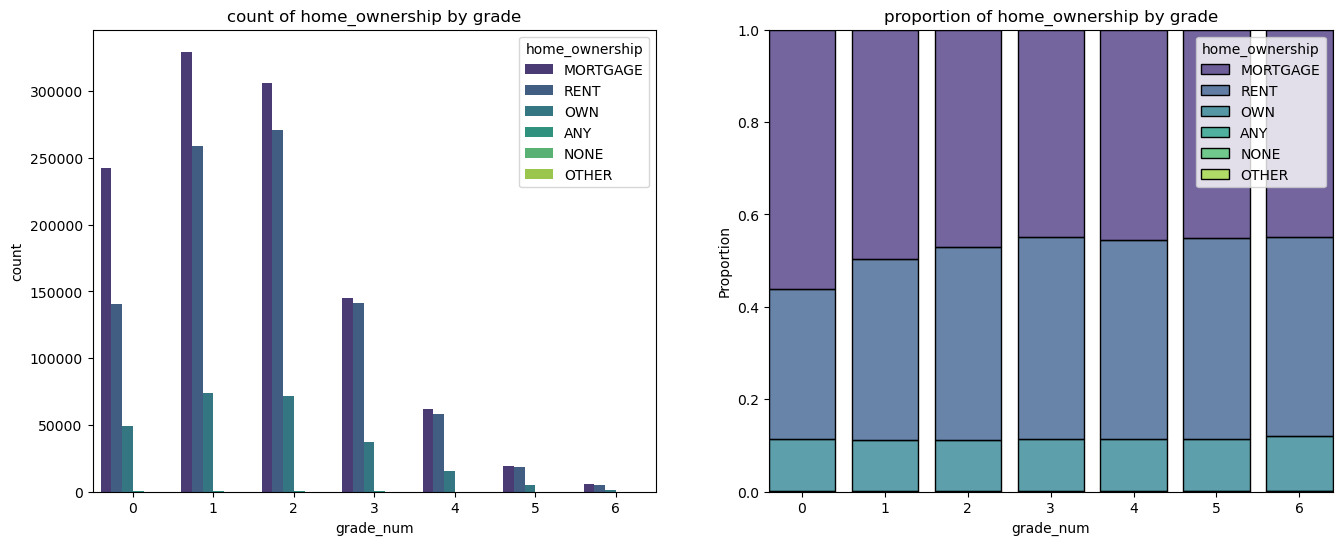

In [51]:
myFunc.my_plots(
    accepted_loan_df,
    "grade_num",
    "home_ownership",
    "count of home_ownership by grade",
    "proportion of home_ownership by grade",
)

The majority of LC clients have a mortgaged house, while some are renting, and only a few own their homes. When examining this by grade, we can observe that the proportion of home ownership remains consistent across different grades.

### Loan status

Current status of the loan.

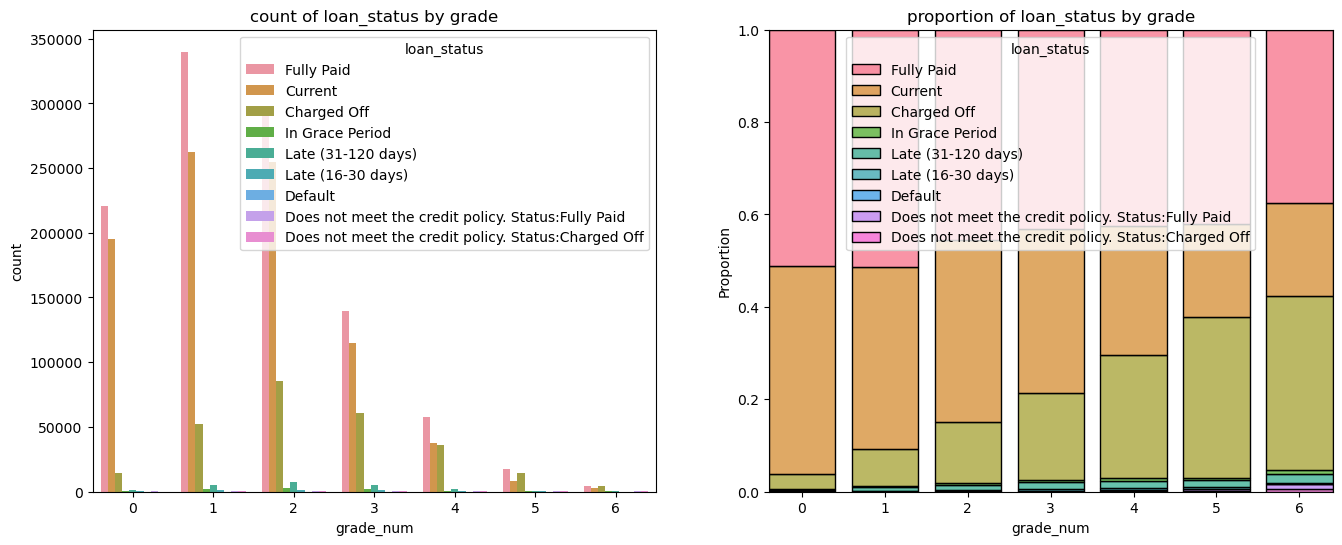

In [52]:
myFunc.my_plots(
    accepted_loan_df,
    "grade_num",
    "loan_status",
    "count of loan_status by grade",
    "proportion of loan_status by grade",
)

We may see, that grade 6 is most problemating of all grades, because the biggest proportion is charged of wich means that lender or financial institution no longer expects to be repaid by the borrower. It typically occurs when the borrower has missed payments for an extended period, and the lender believes that the debt is unlikely to be recovered. This grade is most risky to company and need to be predicted most carefully.

### Application_type

Application tyoe can be individual or joint application.

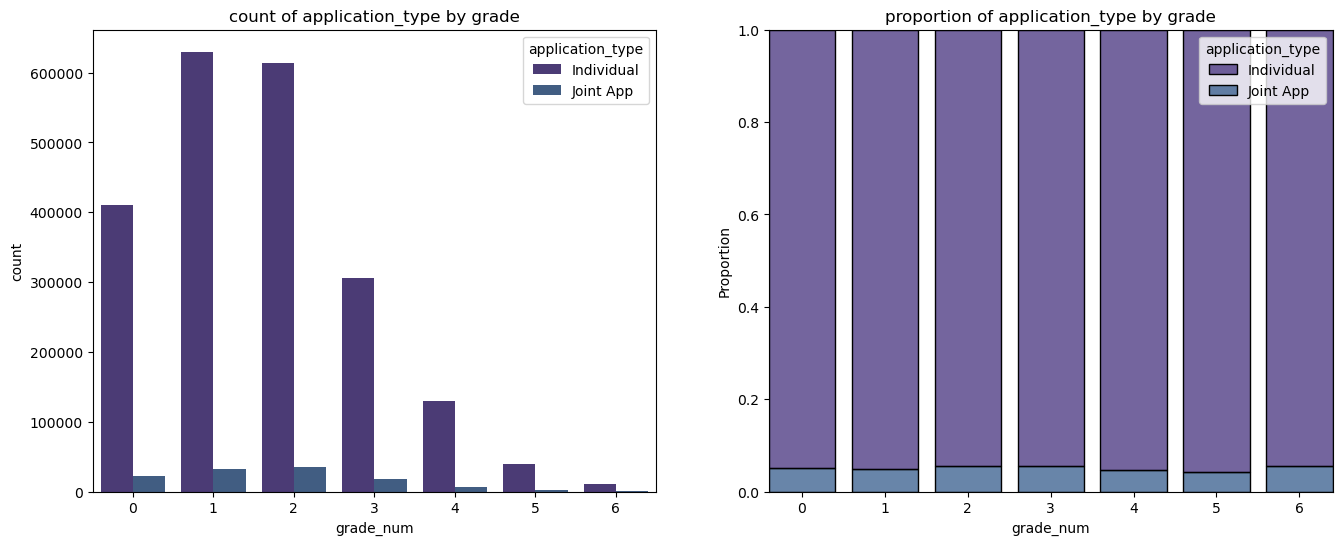

In [53]:
myFunc.my_plots(
    accepted_loan_df,
    "grade_num",
    "application_type",
    "count of application_type by grade",
    "proportion of application_type by grade",
)

Most of the LC clients is tryig to get loan individual. When examining this by grade, we can observe that the proportion of application type remains consistent across different grades.

### Initial list status

The "initial listing status" of a loan typically refers to the status of a loan when it is initially listed or made available for potential investors on LendingClub. It can have few designations, including:
- Funded: This means that the loan has received enough investor commitments to be fully funded, and the borrower will receive the requested loan amount.
- Withdrawn: The borrower has chosen to withdraw their loan listing before it was fully funded.

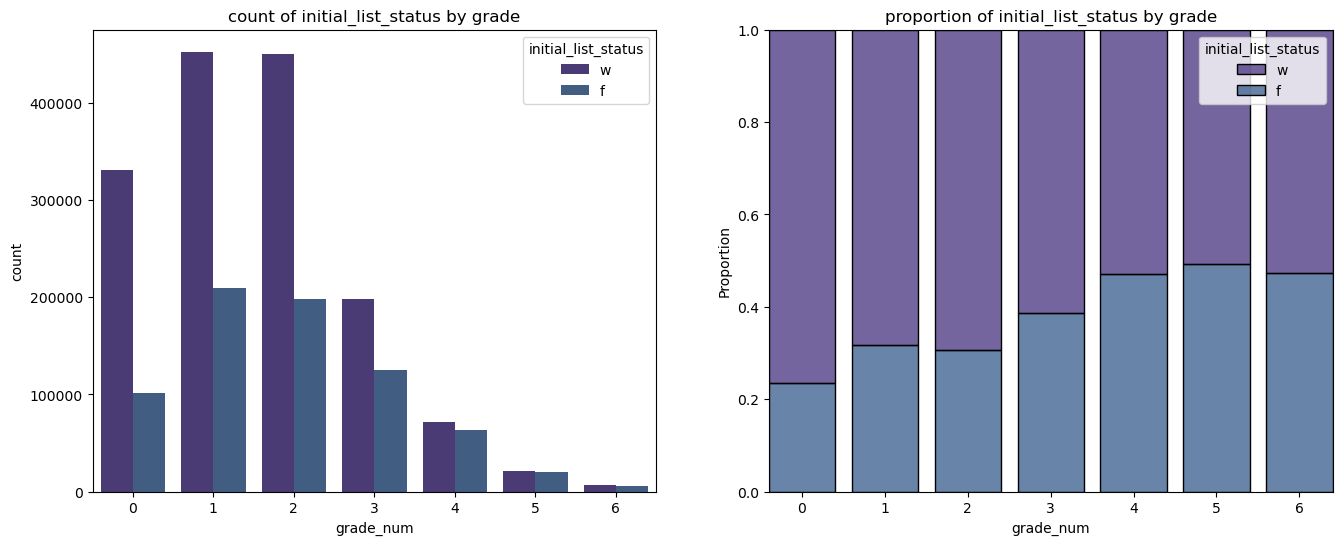

In [54]:
myFunc.my_plots(
    accepted_loan_df,
    "grade_num",
    "initial_list_status",
    "count of initial_list_status by grade",
    "proportion of initial_list_status by grade",
)

Most of the LC clients is withdrawing their loan listing before it is fully funded. When examining this by grade, we can observe that the proportion of fully funded slightly grows across higer grades.

### Debt settlement flag

A "debt settlement flag" typically refers to indicator associated with a person's financial history or credit report that signifies they have previously entered into a debt settlement arrangement with a creditor.

Having a debt settlement flag on a credit report can negative impact on credit score, impact on creditworthiness, reduced borrowing options

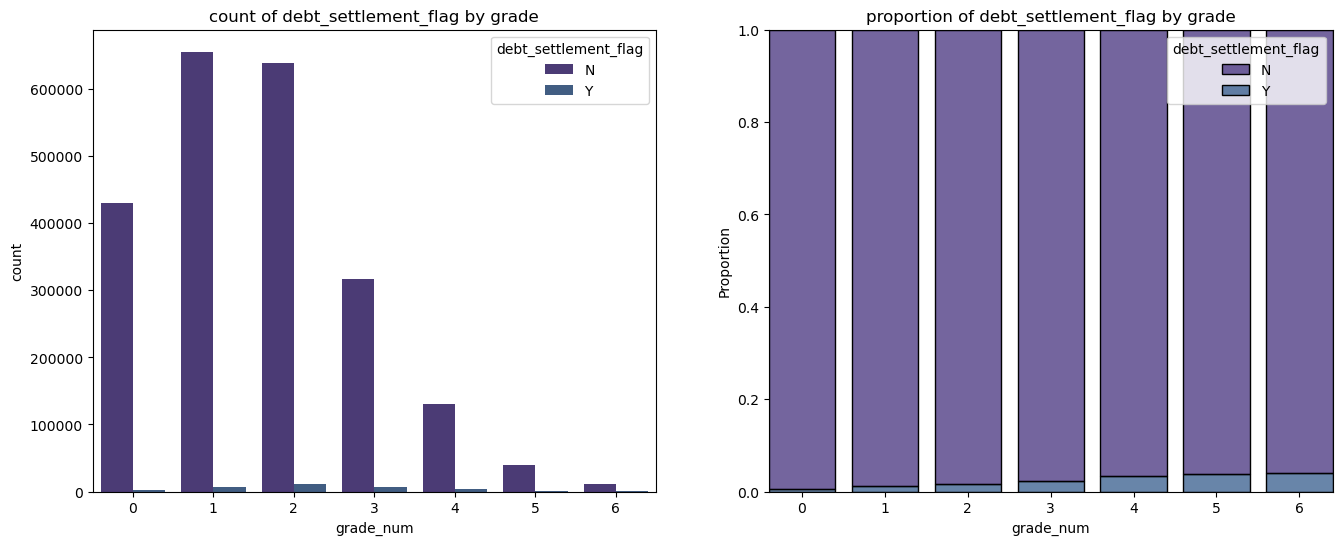

In [55]:
myFunc.my_plots(
    accepted_loan_df,
    "grade_num",
    "debt_settlement_flag",
    "count of debt_settlement_flag by grade",
    "proportion of debt_settlement_flag by grade",
)

Most of the LC clients never have previously entered into a debt settlement arrangement with a creditor. When examining this by grade, we can observe that the debt settlement flag slightly grows across higer grades.

# EDA for Numeric features

### Correlation

This dataframe is very big, so let's focus just on those variables, wich are likely to be important for our target features. Let's use correlation to extract most important features.

In [56]:
treshhold = 0.3
cor = accepted_loan_df.corr()
a = abs(cor["int_rate"])
result = a[a > treshhold]
result.sort_values(ascending=False)

int_rate                                     1.00
sub_grade_num                                0.98
grade_num                                    0.95
hardship_amount                              0.62
orig_projected_additional_accrued_interest   0.61
Risk_Score                                   0.42
total_rec_int                                0.42
term                                         0.37
sec_app_fico_range_low                       0.36
sec_app_fico_range_high                      0.36
last_fico_range_high                         0.35
settlement_amount                            0.31
Name: int_rate, dtype: float64

We may see, that int_rate, sub_grade and grade are very correlated. I will continue analysis with just most important features listed in the table above.

In [57]:
accepted_loan_df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term,Month issue_d,Year issue_d,Risk_Score,grade_num,sub_grade_num
0,0,3600.00,3600.00,3600.00,36.00,13.99,123.03,C,C4,10.00,MORTGAGE,55000.00,Not Verified,Fully Paid,n,PA,5.91,0.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,4421.72,4421.72,3600.00,821.72,0.00,0.00,0.00,122.67,564.00,560.00,0.00,30.00,1.00,Individual,NaN,NaN,NaN,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,12.00,2015.00,677.00,2,13
1,1,24700.00,24700.00,24700.00,36.00,11.99,820.28,C,C1,10.00,MORTGAGE,65000.00,Not Verified,Fully Paid,n,SD,16.06,1.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,25679.66,25679.66,24700.00,979.66,0.00,0.00,0.00,926.35,699.00,695.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,12.00,2015.00,717.00,2,10
2,2,20000.00,20000.00,20000.00,60.00,10.78,432.66,B,B4,10.00,MORTGAGE,63000.00,Not Verified,Fully Paid,n,IL,10.78,0.00,0.00,NaN,NaN,6.00,0.00,7869.00,56.20,18.00,w,0.00,0.00,22705.92,22705.92,20000.00,2705.92,0.00,0.00,0.00,15813.30,704.00,700.00,0.00,NaN,1.00,Joint App,71000.00,13.85,Not

In [58]:
accepted_loan_df = accepted_loan_df[
    [
        "int_rate",
        "sub_grade",
        "sub_grade_num",
        "grade_num",
        "grade",
        "annual_inc",
        "funded_amnt",
        "installment",
        "bc_open_to_buy",
        "hardship_amount",
        "orig_projected_additional_accrued_interest",
        "dti_joint",
        "total_rec_int",
        "term",
        "hardship_payoff_balance_amount",
        "Risk_Score",
        "settlement_amount",
    ]
]
accepted_loan_df.head()

,int_rate,sub_grade,sub_grade_num,grade_num,grade,annual_inc,funded_amnt,installment,bc_open_to_buy,hardship_amount,orig_projected_additional_accrued_interest,dti_joint,total_rec_int,term,hardship_payoff_balance_amount,Risk_Score,settlement_amount
0,13.99,C4,13,2,C,55000.00,3600.00,123.03,1506.00,NaN,NaN,NaN,821.72,36.00,NaN,677.00,NaN
1,11.99,C1,10,2,C,65000.00,24700.00,820.28,57830.00,NaN,NaN,NaN,979.66,36.00,NaN,717.00,NaN
2,10.78,B4,8,1,B,63000.00,20000.00,432.66,2737.00,NaN,NaN,13.85,2705.92,60.00,NaN,697.00,NaN
3,14.85,C5,14,2,C,110000.00,35000.00,829.90,54962.00,NaN,NaN,NaN,12361.66,60.00,NaN,787.00,NaN
4,22.45,F1,25,5,F,104433.00,10400.00,289.91,4567.00,NaN,NaN,NaN,1340.50,60.00,NaN,697.00,NaN


So the result of this part is that we have a data set of features wich are correlated with target features: grade, sub_grade and int_rate.

### Overview of numeric features

In [59]:
accepted_loan_df.describe()

,int_rate,sub_grade_num,grade_num,annual_inc,funded_amnt,installment,bc_open_to_buy,hardship_amount,orig_projected_additional_accrued_interest,dti_joint,total_rec_int,term,hardship_payoff_balance_amount,Risk_Score,settlement_amount
count,2256394.00,2256394.00,2256394.00,2256390.00,2256394.00,2256394.00,2181546.00,10894.00,8635.00,116433.00,2256394.00,2256394.00,10894.00,2256394.00,34233.00
mean,13.09,10.28,1.66,78126.74,15032.39,445.56,11394.43,154.85,454.37,19.15,2431.67,42.90,11623.30,700.57,5009.46
std,4.83,6.30,1.26,112759.86,9182.15,266.99,16598.49,128.94,375.13,7.78,2680.68,10.86,7617.89,33.00,3691.50
min,5.31,0.00,0.00,0.00,500.00,4.93,0.00,0.64,1.92,0.00,0.00,36.00,55.73,612.00,44.21
25%,9.49,6.00,1.00,46000.00,8000.00,251.61,1722.00,59.37,175.12,13.47,728.13,36.00,5622.41,677.00,2208.00
50%,12.62,10.00,2.00,65000.00,12800.00,377.70,5443.00,119.01,352.62,18.75,1525.66,36.00,10021.64,692.00,4146.00
75%,15.99,14.00,2.00,93000.00,20000.00,592.79,14189.00,212.58,619.58,24.49,3107.90,60.00,16114.74,717.00,6849.29
max,30.99,34.00,6.00,110000000.00,40000.00,1719.83,711140.00,943.94,2680.89,69.49,28192.50,60.00,40306.41,847.50,33601.00


Since grade, sub_grade, and int_rate are strongly correlated, there is no need to analyze them separately. All insights apply to all of these target features.

[Text(0.5, 0, 'grade_num')]

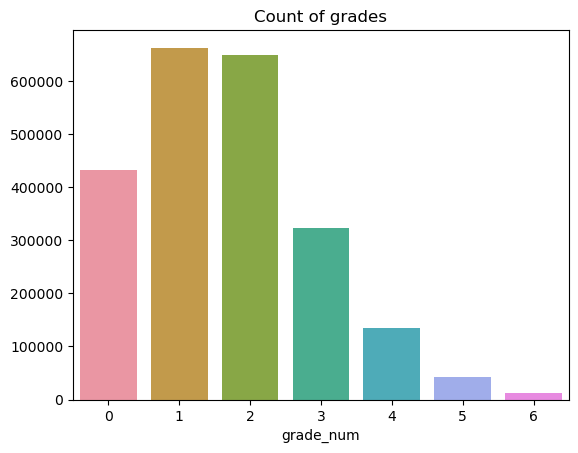

In [60]:
ax = sns.countplot(x="grade_num", data=accepted_loan_df)
ax.set_title("Count of grades")
ax.set(ylabel="")
ax.set(xlabel="grade_num")

We may see, that our dataset is imbalanced and grades B(1), C(2) are the most popular.

In [61]:
accepted_loan_df_viol = accepted_loan_df.drop(["grade", "sub_grade"], axis=1)

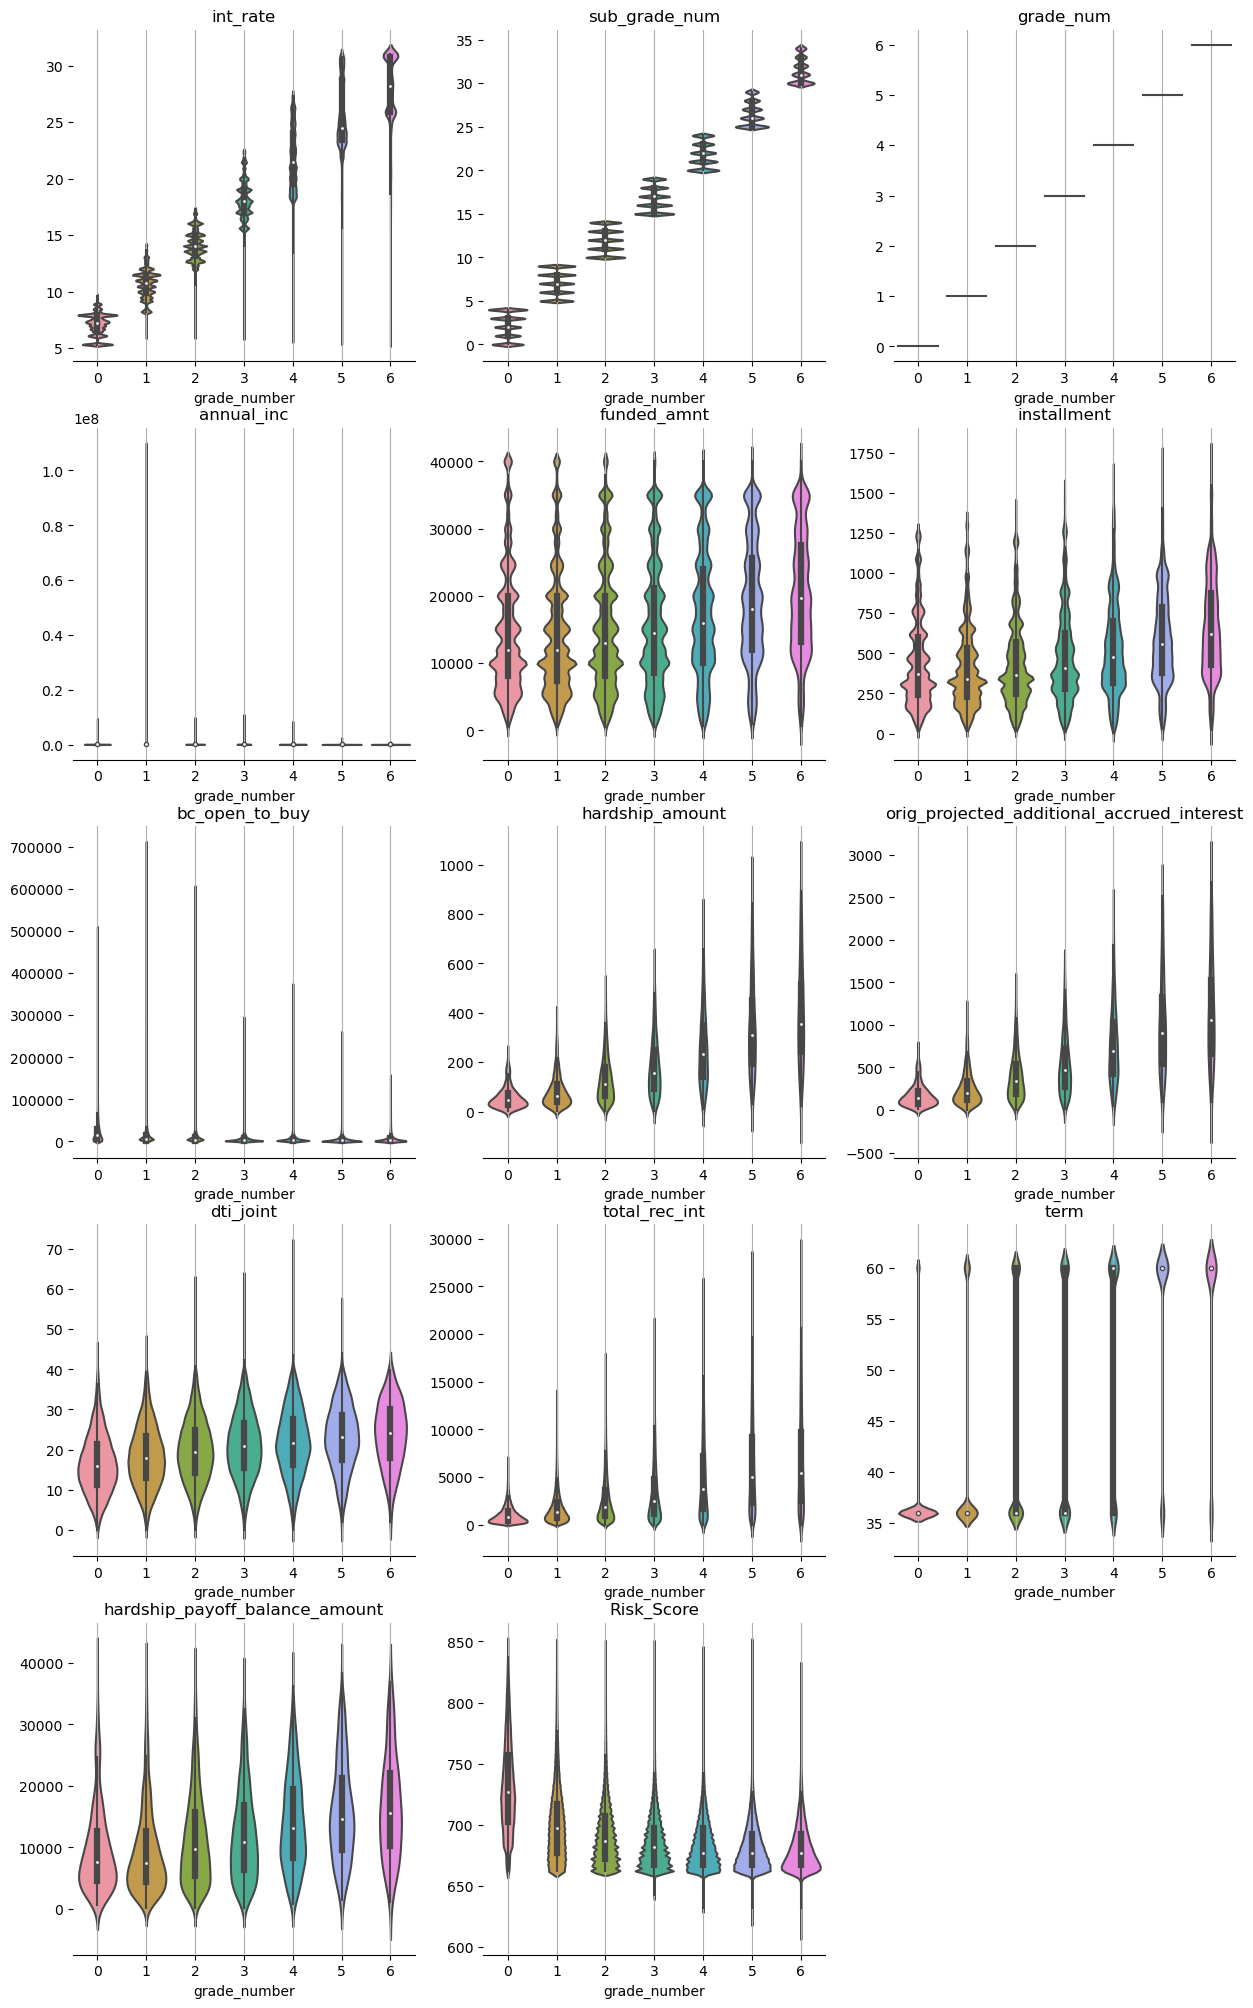

In [62]:
plt.figure(figsize=(15, 25))
for i in range(1, len(accepted_loan_df_viol.columns)):
    plt.subplot(5, 3, i)
    ax = sns.violinplot(
        x="grade_num",
        y=accepted_loan_df_viol.columns[i - 1],
        data=accepted_loan_df_viol,
        dodge=True,
    )
    ax.xaxis.grid(True)
    ax.set_title(f"{accepted_loan_df_viol.columns[i-1]}")
    ax.set(xlabel="grade_number")
    ax.set(ylabel="")
    sns.despine(right=True, left=True)
plt.show()

From the violin plots we may see:

- Risk scores are higer in smaller grades.

- Funded_amnt,	installment, hardship_amount,	orig_projected_additional_accrued_interest, dti_joint,	total_rec_int, hardship_payoff_balance_amount are smaller in smaller grades

- The smaller grades ussually have shorter term while the larger grades gets longer term.

- Grades do not depend on annual income.

All thease insigns also apply to subgrades and size of interest rate.

### Terminology (additional)


- "Total Rec Int" in LendingClub (LC) likely stands for "Total Received Interest." It is a term used to represent the total amount of interest that has been received on a loan or a group of loans within the LendingClub platform. In the context of peer-to-peer lending and online lending platforms like LendingClub, this metric is crucial for both investors and borrowers. For investors, it indicates the total interest income earned from their investments. For borrowers, it represents the total interest they have paid on their loans.

- A "risk score" The most common type of risk score is a credit score, which is a numeric representation of a person's creditworthiness based on their credit history. The FICO Credit scores typically range from 300 to 850, with higher scores indicating lower credit risk. A higher credit score is generally associated with better credit terms and lower interest rates, while a lower score may result in less favorable terms or credit denials.

- A "hardship amount" usually refers to a specific portion of financial assistance or benefits provided to individuals or families who are experiencing financial difficulties due to various reasons, such as job loss, illness, natural disasters, or other unexpected circumstances.

- Original projected additional accrued interest refers to the estimated amount of interest that was originally projected to be accrued or earned on a loan. It represents the interest income expected to be generated from the loan over its lifetime, at the time the loan was originated. This value helps both investors and borrowers understand the expected interest earnings and payments associated with a loan. For investors, it provides an estimate of the potential return on their investment, while for borrowers, it illustrates the total interest cost they are expected to pay over the life of the loan.


- the total_rec_int: represents total amount of interest income that has been received or accrued over a specific period or for a specific financial product. "Total Rec Int" could indicate the total interest payments received by a lender from borrowers. Lenders, such as banks or peer-to-peer lending platforms, track the total interest income they receive from the loans they've issued.

- The "BC_Open_To_Buy" is an important metric used by lenders and credit reporting agencies to assess a borrower's financial situation. It can affect their creditworthiness and borrowing capacity. A higher "BC_Open_To_Buy" suggests that the borrower has more available credit, while a lower amount might indicate that the borrower has used a significant portion of their credit limit, which can affect their credit score and ability to obtain additional credit. It's one of the factors considered when evaluating a borrower's credit risk.